# Titanic 1st attempt
This is my first attempt at the kaggle.com Titanic competition:
https://www.kaggle.com/competitions/titanic

The section "Studying the datasets" and other bits were inspired by Titanic Data Science Solutions notebook.

Any comment is much appreciated❗

## Importing the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset
In this case, the dataset is already split between training set and test set

In [43]:
# importing the datasets, already split into 2 files
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

In [44]:
# the training set has "survived" variable...
dataset_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [45]:
# ...while the test set does not, as it's what we need to predict
dataset_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


## Studying the datasets
Before converting anything into array, we first analyze the datasets with specific methods

In [46]:
# columns and datatypes. "object" means string
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
# we can gather additional information from all the int and float values
dataset_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


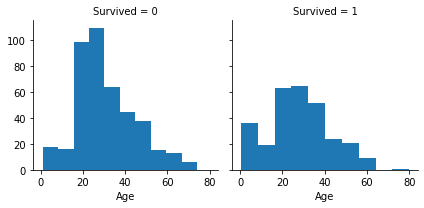

In [48]:
# example of visualization: count of not survived vs. survived people by age
histog = sns.FacetGrid(dataset_train, col='Survived')
histog.map(plt.hist, 'Age', bins=10)

## Data Wrangling
We start with dropping all columns that do not have correlation with the Survival outcome. For simplicity's sake, as this is an exercise, we drop also the Title column, which if engineered could potentially hold meaningful information.

In [49]:
dataset_train = dataset_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# storing the test set passenger ID as it will be use for indexing the output
pid = dataset_test['PassengerId'].tolist()
# dropping the columns from the test set as well
dataset_test = dataset_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Then, we need to take care of missing data:

In [50]:
# getting count of missing data in the training set
print(dataset_train.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [51]:
# getting count of missing data in the test set
print(dataset_test.isnull().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [52]:
# reprinting datasets after dropping columns. After processing with sklearn their datatype
# will change from dataframe to Numpy array, removing the headers
dataset_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [53]:
dataset_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [54]:
# there is only one missing value in the "Fare" column of the test set. I fill it in with the average
# of the "Fare" column of the training set, as the test set is virtually unseen until the end
dataset_test["Fare"] = dataset_test["Fare"].fillna(dataset_train["Fare"].mean())

In [55]:
print(dataset_test.isnull().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64


In [56]:
# defining independent variables to train the models (X_train) as all columns except "Survived"
# and dependent variable as "Survived" column. The resulting datatypes will be Numpy arrays
X_train = dataset_train.iloc[:, 1:].values
X_test = dataset_test.iloc[:, :].values
y_train = dataset_train.iloc[:, 0].values
# y_test = is what we need to predict, and it will be shown in the output

In [57]:
print(X_train)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' nan ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


Since we want to apply several transformations (simple imputing, onehotencoding...) to single columns, the best way is to use ColumnTransformer.
To use the ColumnTransformer, we must specify a list of transformers.

Each transformer is a three-element tuple that defines the name of the transformer, the transform to apply, and the column indices to apply it to. For example:

(Name, Object, Columns)


```
t = [('num', SimpleImputer(strategy='median'), [0, 1], remainder='passthrough'), ('cat', SimpleImputer(strategy='most_frequent'), [2, 3], remainder='passthrough')]
transformer = ColumnTransformer(transformers=t)
```



In [58]:
# importing ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In X_train, there are two columns with missing values: Age has 177 missing values, Embarked has 2.
In X_test, Age has 86 missing values.
The strategy I chose is:
X_train: fill the missing values in Age with the average age value, fill the missing values in Embarked with the most common embarked value
X_test: fill the missing values in Age with the average age value calculated on X_train.

In [59]:
# importing SimpleImputer to process missing values
from sklearn.impute import SimpleImputer
# defining the column transformers list for this operation:
t = [('miss_freq', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), [-1]), ('miss_mean', SimpleImputer(missing_values=np.nan, strategy='mean'), [2])]
t2 = [('onehot', OneHotEncoder(), [0, 3])]
ct = ColumnTransformer(transformers=t, remainder='passthrough')
ct2 = ColumnTransformer(transformers=t2, remainder='passthrough')
# applying the SimpleImputer transformation only to column -1 through ColumnTransformer
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [60]:
print(X_train)

[['S' 22.0 3 ... 1 0 7.25]
 ['C' 38.0 1 ... 1 0 71.2833]
 ['S' 26.0 3 ... 0 0 7.925]
 ...
 ['S' 29.69911764705882 3 ... 1 2 23.45]
 ['C' 26.0 1 ... 0 0 30.0]
 ['Q' 32.0 3 ... 0 0 7.75]]


In [61]:
X_train = ct2.fit_transform(X_train)
X_test = ct2.transform(X_test)

In [62]:
print(X_train)

[[0.0 0.0 1.0 ... 1 0 7.25]
 [1.0 0.0 0.0 ... 1 0 71.2833]
 [0.0 0.0 1.0 ... 0 0 7.925]
 ...
 [0.0 0.0 1.0 ... 1 2 23.45]
 [1.0 0.0 0.0 ... 0 0 30.0]
 [0.0 1.0 0.0 ... 0 0 7.75]]


## Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
# applying feature scaling to columns from 5 and 9
t3 = [('scaler', StandardScaler(), [5, 9])]
ct3 = ColumnTransformer(transformers=t3, remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [64]:
# printing final X_train array before feeding it to the models
with np.printoptions(threshold=np.inf):
    print(X_train)

[[7.25 1.0 0.0 0.0 0.0 1.0 22.0 3 1 0]
 [71.2833 0.0 1.0 0.0 1.0 0.0 38.0 1 1 0]
 [7.925 1.0 0.0 0.0 1.0 0.0 26.0 3 0 0]
 [53.1 1.0 0.0 0.0 1.0 0.0 35.0 1 1 0]
 [8.05 1.0 0.0 0.0 0.0 1.0 35.0 3 0 0]
 [8.4583 0.0 0.0 1.0 0.0 1.0 29.69911764705882 3 0 0]
 [51.8625 1.0 0.0 0.0 0.0 1.0 54.0 1 0 0]
 [21.075 1.0 0.0 0.0 0.0 1.0 2.0 3 3 1]
 [11.1333 1.0 0.0 0.0 1.0 0.0 27.0 3 0 2]
 [30.0708 0.0 1.0 0.0 1.0 0.0 14.0 2 1 0]
 [16.7 1.0 0.0 0.0 1.0 0.0 4.0 3 1 1]
 [26.55 1.0 0.0 0.0 1.0 0.0 58.0 1 0 0]
 [8.05 1.0 0.0 0.0 0.0 1.0 20.0 3 0 0]
 [31.275 1.0 0.0 0.0 0.0 1.0 39.0 3 1 5]
 [7.8542 1.0 0.0 0.0 1.0 0.0 14.0 3 0 0]
 [16.0 1.0 0.0 0.0 1.0 0.0 55.0 2 0 0]
 [29.125 0.0 0.0 1.0 0.0 1.0 2.0 3 4 1]
 [13.0 1.0 0.0 0.0 0.0 1.0 29.69911764705882 2 0 0]
 [18.0 1.0 0.0 0.0 1.0 0.0 31.0 3 1 0]
 [7.225 0.0 1.0 0.0 1.0 0.0 29.69911764705882 3 0 0]
 [26.0 1.0 0.0 0.0 0.0 1.0 35.0 2 0 0]
 [13.0 1.0 0.0 0.0 0.0 1.0 34.0 2 0 0]
 [8.0292 0.0 0.0 1.0 1.0 0.0 15.0 3 0 0]
 [35.5 1.0 0.0 0.0 0.0 1.0 28.0 1 0 0]
 

In [65]:
# printing final X_test
with np.printoptions(threshold=np.inf):
    print(X_test)

[[7.8292 0.0 0.0 1.0 0.0 1.0 34.5 3 0 0]
 [7.0 1.0 0.0 0.0 1.0 0.0 47.0 3 1 0]
 [9.6875 0.0 0.0 1.0 0.0 1.0 62.0 2 0 0]
 [8.6625 1.0 0.0 0.0 0.0 1.0 27.0 3 0 0]
 [12.2875 1.0 0.0 0.0 1.0 0.0 22.0 3 1 1]
 [9.225 1.0 0.0 0.0 0.0 1.0 14.0 3 0 0]
 [7.6292 0.0 0.0 1.0 1.0 0.0 30.0 3 0 0]
 [29.0 1.0 0.0 0.0 0.0 1.0 26.0 2 1 1]
 [7.2292 0.0 1.0 0.0 1.0 0.0 18.0 3 0 0]
 [24.15 1.0 0.0 0.0 0.0 1.0 21.0 3 2 0]
 [7.8958 1.0 0.0 0.0 0.0 1.0 29.69911764705882 3 0 0]
 [26.0 1.0 0.0 0.0 0.0 1.0 46.0 1 0 0]
 [82.2667 1.0 0.0 0.0 1.0 0.0 23.0 1 1 0]
 [26.0 1.0 0.0 0.0 0.0 1.0 63.0 2 1 0]
 [61.175 1.0 0.0 0.0 1.0 0.0 47.0 1 1 0]
 [27.7208 0.0 1.0 0.0 1.0 0.0 24.0 2 1 0]
 [12.35 0.0 0.0 1.0 0.0 1.0 35.0 2 0 0]
 [7.225 0.0 1.0 0.0 0.0 1.0 21.0 3 0 0]
 [7.925 1.0 0.0 0.0 1.0 0.0 27.0 3 1 0]
 [7.225 0.0 1.0 0.0 1.0 0.0 45.0 3 0 0]
 [59.4 0.0 1.0 0.0 0.0 1.0 55.0 1 1 0]
 [3.1708 1.0 0.0 0.0 0.0 1.0 9.0 3 0 1]
 [31.6833 1.0 0.0 0.0 1.0 0.0 29.69911764705882 1 0 0]
 [61.3792 0.0 1.0 0.0 0.0 1.0 21.0 1 0 1]
 [2

## Training and evaluating the models on the Training set

### Decision Tree classifier

In [66]:
# decision tree model implementation
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree.fit(X_train, y_train)
# decision tree model prediction: since this turned out to be the best model,
# this is the only one that I chose to use to generate y_pred.
y_pred = decision_tree.predict(X_test)

In [67]:
# decision tree evaluation score:
decision_tree.score(X_train, y_train)

0.9820426487093153

### Logistic regression

In [68]:
# logistic regression model implementation
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(random_state = 0)
log_reg_classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [69]:
# logistic regression evaluation score:
log_reg_classifier.score(X_train, y_train)

0.8024691358024691

### K-nearest neighbors

In [70]:
# k-nearest neighbors model implementation (5 neighbors and Minkowski distance)
from sklearn.neighbors import KNeighborsClassifier
k_near_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
k_near_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
# k-nearest neighbors evaluation score:
k_near_classifier.score(X_train, y_train)

0.8181818181818182

### Random forest

In [72]:
# random forest model implementation (10 decision trees)
from sklearn.ensemble import RandomForestClassifier
ran_for_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
ran_for_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [73]:
# random forest evaluation score:
ran_for_classifier.score(X_train, y_train)

0.9640852974186308

### Naive Bayes

In [74]:
# naive Bayes model implementation
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [75]:
# naive Bayes evaluation score:
nb_classifier.score(X_train, y_train)

0.7912457912457912

### Support Vector Machine

In [76]:
# SVM model implementation
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [77]:
# SVM evaluation score:
svm_classifier.score(X_train, y_train)

0.7867564534231201

### Kernel SVM

In [78]:
# Kernel SVM model implementation
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [79]:
# Kernel SVM evaluation score:
svc_classifier.score(X_train, y_train)

0.6868686868686869

## Generating .csv output

In [80]:
submission = pd.DataFrame({
    "PassengerId": pid,
    "Survived": y_pred
    })
#submission.to_csv('../output/submission.csv', index=False)